In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.manifold import TSNE
import umap

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_forma_z = pd.read_csv(os.path.join(folder_path, "features_shape_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_forma_mm = pd.read_csv(os.path.join(folder_path, "features_shape_minmax.csv"))

In [3]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_forma_z_cl= df_forma_z.drop(columns=['filename', 'label'])

In [4]:
# Estimar el bandwidth automáticamente
bandwidth = estimate_bandwidth(df_forma_z_cl.values, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df_forma_z_cl.values)
labels_zscore = ms.labels_
n_clusters = len(np.unique(labels_zscore))

unique, counts = np.unique(labels_zscore, return_counts=True)

if n_clusters > 1 and all(count > 1 for count in counts):
    score = silhouette_score(df_forma_z_cl, labels_zscore)
    print(f"Auto Bandwidth: {bandwidth:.3f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
else:
    print(f"Auto Bandwidth: {bandwidth:.3f} | Clusters: {n_clusters} | Silhouette Score: N/A (clústeres demasiado pequeños)")

Auto Bandwidth: 2.516 | Clusters: 2 | Silhouette Score: 0.333


In [26]:
bandwidth_values = [2.55, 2.5, 2.556, 2.49, 2.53, 2, 1.7]

for bw in bandwidth_values:
    ms = MeanShift(bandwidth=bw, bin_seeding=True)
    ms.fit(df_forma_z_cl.values)
    labels_zscore = ms.labels_
    n_clusters = len(np.unique(labels_zscore))
    
    if n_clusters > 1:  # Solo tiene sentido calcular Silhouette si hay más de 1 clúster
        score = silhouette_score(df_forma_z_cl, labels_zscore)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 2.55 | Clusters: 2 | Silhouette Score: 0.333
Bandwidth: 2.50 | Clusters: 2 | Silhouette Score: 0.332
Bandwidth: 2.56 | Clusters: 2 | Silhouette Score: 0.333
Bandwidth: 2.49 | Clusters: 2 | Silhouette Score: 0.333
Bandwidth: 2.53 | Clusters: 2 | Silhouette Score: 0.333
Bandwidth: 2.00 | Clusters: 7 | Silhouette Score: 0.256
Bandwidth: 1.70 | Clusters: 19 | Silhouette Score: 0.078


In [6]:
bandwidth = bandwidth 
ms = MeanShift(bandwidth=bandwidth)
ms.fit(df_forma_z_cl)
labels_zscore = ms.labels_

In [8]:
contingency_table = pd.crosstab(df_forma_z['label'], labels_zscore, rownames=['Etiqueta Real'], colnames=['Etiqueta Predicha'])
print(contingency_table)

Etiqueta Predicha    0    1
Etiqueta Real              
higher_than        251   17
smaller_than        51  218


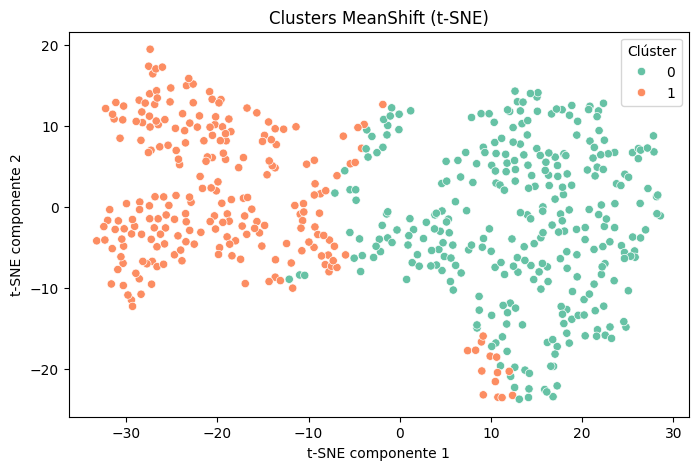

          filename         label  cluster
0      callo_1.png  smaller_than        1
1     callo_10.png  smaller_than        0
2    callo_100.png  smaller_than        1
3    callo_101.png  smaller_than        1
4    callo_102.png  smaller_than        1
..             ...           ...      ...
532   callo_95.png   higher_than        0
533   callo_96.png   higher_than        0
534   callo_97.png   higher_than        0
535   callo_98.png   higher_than        0
536   callo_99.png   higher_than        0

[537 rows x 3 columns]


In [9]:
tsne_z = TSNE(n_components=2, random_state=42)
X_tsne_z = tsne_z.fit_transform(df_forma_z_cl.values)
# Visualización con Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne_z[:, 0], y=X_tsne_z[:, 1], hue=labels_zscore, palette='Set2')
plt.title('Clusters MeanShift (t-SNE)')
plt.xlabel('t-SNE componente 1')
plt.ylabel('t-SNE componente 2')
plt.legend(title='Clúster')
plt.show()

# Guardar resultados en DataFrame
df_resultado = pd.DataFrame({
    'filename': df_forma_z['filename'],
    'label': df_forma_z['label'],
    'cluster': labels_zscore
})

# Mostrar primeras filas
print(df_resultado)

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\tere1\AppData\Local\Temp\ipykernel_20096\1525403897.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_z[:, 0], X_umap_z[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


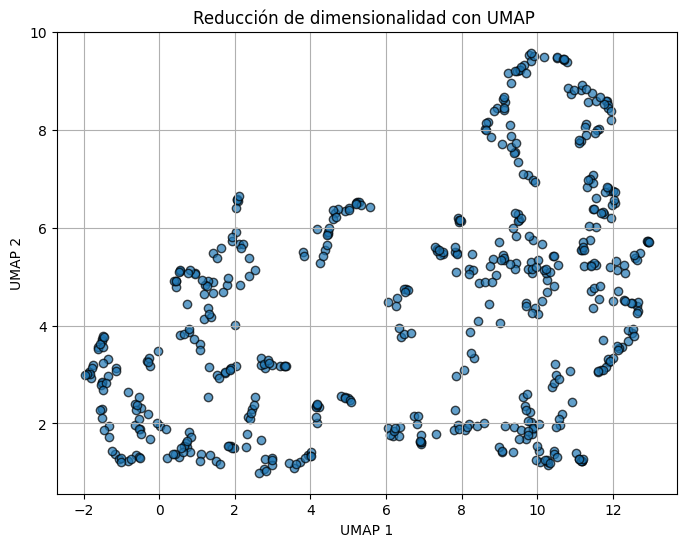

In [10]:
# Reduccion de la dimensionalidad con UMAP
umap_model_z = umap.UMAP(n_neighbors=5,n_components=2, random_state=42)
X_umap_z = umap_model_z.fit_transform(df_forma_z_cl)

# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_z[:, 0], X_umap_z[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [12]:
# Estimación del bandwidth
bandwidth_umap = estimate_bandwidth(X_umap_z, quantile=0.2, n_samples=500)

# Ajuste de MeanShift
ms_umap = MeanShift(bandwidth=bandwidth_umap, bin_seeding=True)
ms_umap.fit(X_umap_z)
labels_umap = ms_umap.labels_  
n_clusters = len(np.unique(labels_umap))

# Contar los elementos en cada clúster
unique, counts = np.unique(labels_umap, return_counts=True)

# Mostrar resultados solo si hay más de un clúster y los clústeres son adecuados
if n_clusters > 1 and all(count > 1 for count in counts):
    score = silhouette_score(X_umap_z, labels_umap)
    print(f"Auto Bandwidth: {bandwidth_umap:.3f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
else:
    print(f"Auto Bandwidth: {bandwidth_umap:.3f} | Clusters: {n_clusters} | Silhouette Score: N/A (clústeres demasiado pequeños)")

Auto Bandwidth: 2.985 | Clusters: 2 | Silhouette Score: 0.580


In [21]:
bandwidth_values_umap = [2.98, 2.85, 3.00, 2.99, 2 ]

for bw in bandwidth_values_umap:
    ms_umap = MeanShift(bandwidth=bw, bin_seeding=True)
    ms_umap.fit(X_umap_z)
    labels_umap = ms_umap.labels_
    n_clusters = len(np.unique(labels_umap))
    
    if n_clusters > 1:  # 
        score = silhouette_score(X_umap_z, labels_umap)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 2.98 | Clusters: 2 | Silhouette Score: 0.580
Bandwidth: 2.85 | Clusters: 3 | Silhouette Score: 0.432
Bandwidth: 3.00 | Clusters: 2 | Silhouette Score: 0.580
Bandwidth: 2.99 | Clusters: 2 | Silhouette Score: 0.580
Bandwidth: 2.00 | Clusters: 9 | Silhouette Score: 0.477


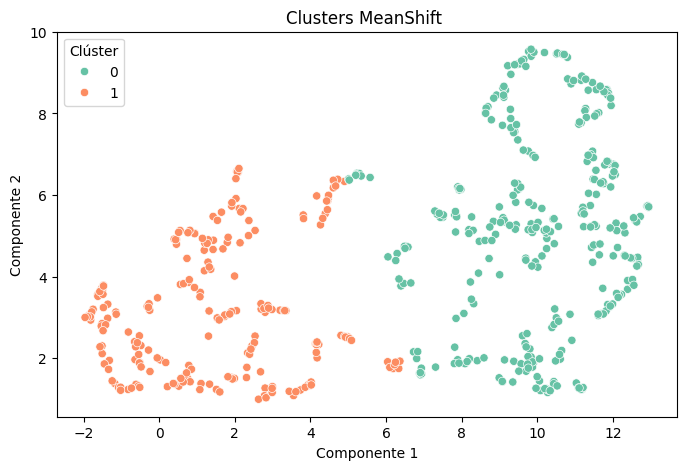

        filename         label  cluster
0    callo_1.png  smaller_than        1
1   callo_10.png  smaller_than        0
2  callo_100.png  smaller_than        1
3  callo_101.png  smaller_than        1
4  callo_102.png  smaller_than        1


In [23]:
bandwidth_def = 2.98
meanshift_z = MeanShift(bandwidth=bandwidth_def, bin_seeding=True)
meanshift_z.fit(X_umap_z) 
labels_umap = meanshift_z.labels_  

# Visualización con Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap_z[:, 0], y=X_umap_z[:, 1], hue=labels_umap, palette='Set2')
plt.title('Clusters MeanShift ')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Clúster')
plt.show()

# Guardar resultados en DataFrame
df_resultado = pd.DataFrame({
    'filename': df_forma_z['filename'],
    'label': df_forma_z['label'],
    'cluster': labels_umap  # Usamos las etiquetas generadas en la última ejecución
})

# Mostrar primeras filas
print(df_resultado.head())


In [24]:
y_true = df_forma_z['label']
y_pred = meanshift_z.labels_

# Crear tabla de contingencia
contingency_table = pd.crosstab(y_true, y_pred, 
                                 rownames=['Etiqueta Real'], 
                                 colnames=['Clúster MeanShift'])

# Mostrar la tabla
print(contingency_table)

Clúster MeanShift    0    1
Etiqueta Real              
higher_than        252   16
smaller_than        65  204


con min-max:

In [28]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_forma_mm_cl= df_forma_mm.drop(columns=['filename', 'label'])

In [31]:
# Estimar el bandwidth automáticamente
bandwidth = estimate_bandwidth(df_forma_mm_cl.values, quantile=0.2, n_samples=500)

ms_mm = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_mm.fit(df_forma_mm_cl.values)
labels_mm = ms_mm.labels_
n_clusters = len(np.unique(labels_mm))

unique, counts = np.unique(labels_mm, return_counts=True)

if n_clusters > 1 and all(count > 1 for count in counts):
    score = silhouette_score(df_forma_mm_cl, labels_mm)
    print(f"Auto Bandwidth: {bandwidth:.3f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
else:
    print(f"Auto Bandwidth: {bandwidth:.3f} | Clusters: {n_clusters} | Silhouette Score: N/A (clústeres demasiado pequeños)")

Auto Bandwidth: 0.527 | Clusters: 2 | Silhouette Score: 0.323


In [ ]:
bandwidth_values = [0.527, 0.35, 0.54, 0.49,0.51, 0.5]

for bw in bandwidth_values:
    ms_mm = MeanShift(bandwidth=bw, bin_seeding=True)
    ms_mm.fit(df_forma_mm_cl.values)
    labels_mm = ms_mm.labels_
    n_clusters = len(np.unique(labels_mm))
    
    if n_clusters > 1:  
        score = silhouette_score(df_forma_mm_cl, labels_mm)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 0.53 | Clusters: 2 | Silhouette Score: 0.323
Bandwidth: 0.35 | Clusters: 15 | Silhouette Score: 0.158
Bandwidth: 0.54 | Clusters: 2 | Silhouette Score: 0.323
Bandwidth: 0.49 | Clusters: 3 | Silhouette Score: 0.270
Bandwidth: 0.51 | Clusters: 2 | Silhouette Score: 0.323
Bandwidth: 0.50 | Clusters: 2 | Silhouette Score: 0.323


In [34]:
bandwidth = bandwidth 
ms = MeanShift(bandwidth=bandwidth)
ms.fit(df_forma_mm_cl)
labels_mm = ms.labels_

In [35]:
contingency_table_mm = pd.crosstab(df_forma_mm['label'], labels_mm, rownames=['Etiqueta Real'], colnames=['Etiqueta Predicha'])
print(contingency_table_mm)

Etiqueta Predicha    0    1
Etiqueta Real              
higher_than        243   25
smaller_than        42  227


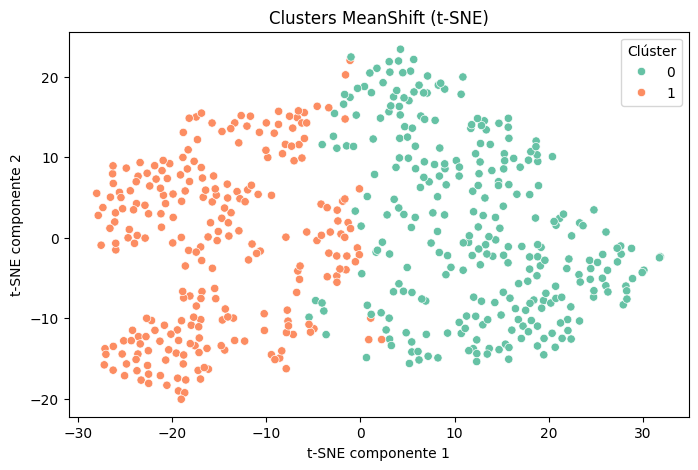

          filename         label  cluster
0      callo_1.png  smaller_than        1
1     callo_10.png  smaller_than        0
2    callo_100.png  smaller_than        1
3    callo_101.png  smaller_than        1
4    callo_102.png  smaller_than        1
..             ...           ...      ...
532   callo_95.png   higher_than        0
533   callo_96.png   higher_than        0
534   callo_97.png   higher_than        0
535   callo_98.png   higher_than        0
536   callo_99.png   higher_than        0

[537 rows x 3 columns]


In [36]:
tsne_mm = TSNE(n_components=2, random_state=42)
X_tsne_mm = tsne_mm.fit_transform(df_forma_mm_cl.values)
# Visualización con Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne_mm[:, 0], y=X_tsne_mm[:, 1], hue=labels_mm, palette='Set2')
plt.title('Clusters MeanShift (t-SNE)')
plt.xlabel('t-SNE componente 1')
plt.ylabel('t-SNE componente 2')
plt.legend(title='Clúster')
plt.show()

# Guardar resultados en DataFrame
df_resultado_mm = pd.DataFrame({
    'filename': df_forma_mm['filename'],
    'label': df_forma_mm['label'],
    'cluster': labels_mm
})

# Mostrar primeras filas
print(df_resultado_mm)

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\tere1\AppData\Local\Temp\ipykernel_20096\3809271199.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


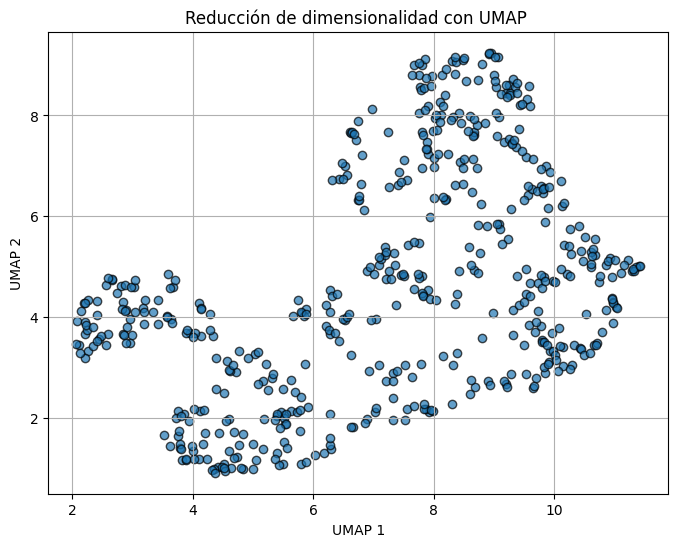

In [109]:
# Reduccion de la dimensionalidad con UMAP
umap_model_mm = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
X_umap_mm = umap_model_mm.fit_transform(df_forma_mm_cl)

# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [ ]:
# Estimación del bandwidth
bandwidth_umap_mm = estimate_bandwidth(X_umap_mm, quantile=0.2, n_samples=500)

# Ajuste de MeanShift
ms_umap_mm = MeanShift(bandwidth=bandwidth_umap_mm, bin_seeding=True)
ms_umap_mm.fit(X_umap_mm)
labels_umap_mm = ms_umap_mm.labels_  
n_clusters = len(np.unique(labels_umap_mm))

# Contar los elementos en cada clúster
unique, counts = np.unique(labels_umap_mm, return_counts=True)


if n_clusters > 1 and all(count > 1 for count in counts):
    score = silhouette_score(X_umap_mm, labels_umap_mm)
    print(f"Auto Bandwidth: {bandwidth_umap_mm:.3f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
else:
    print(f"Auto Bandwidth: {bandwidth_umap_mm:.3f} | Clusters: {n_clusters} | Silhouette Score: N/A (clústeres demasiado pequeños)")


Auto Bandwidth: 2.121 | Clusters: 3 | Silhouette Score: 0.493


In [119]:
bandwidth_values_umap_mm = [2.98, 2.85, 3.00, 2.99, 2.121, 2.87 ]

for bw in bandwidth_values_umap_mm:
    ms_umap_mm = MeanShift(bandwidth=bw, bin_seeding=True)
    ms_umap_mm.fit(X_umap_mm)
    labels_umap_mm = ms_umap_mm.labels_
    n_clusters = len(np.unique(labels_umap_mm))
    
    if n_clusters > 1:  # 
        score = silhouette_score(X_umap_mm, labels_umap_mm)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 2.98 | Clusters: 2 | Silhouette Score: 0.515
Bandwidth: 2.85 | Clusters: 2 | Silhouette Score: 0.514
Bandwidth: 3.00 | Clusters: 2 | Silhouette Score: 0.513
Bandwidth: 2.99 | Clusters: 2 | Silhouette Score: 0.513
Bandwidth: 2.12 | Clusters: 3 | Silhouette Score: 0.493
Bandwidth: 2.87 | Clusters: 2 | Silhouette Score: 0.515


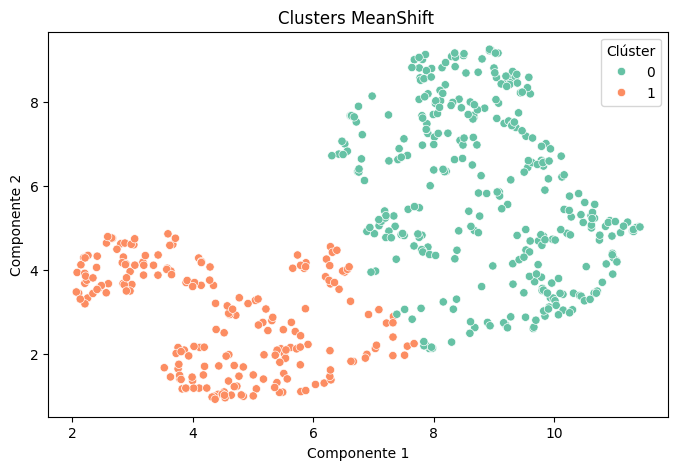

        filename         label  cluster
0    callo_1.png  smaller_than        1
1   callo_10.png  smaller_than        0
2  callo_100.png  smaller_than        1
3  callo_101.png  smaller_than        1
4  callo_102.png  smaller_than        1


In [120]:
bandwidth_def_mm = 2.98
meanshift_mm = MeanShift(bandwidth=bandwidth_def_mm, bin_seeding=True)
meanshift_mm.fit(X_umap_mm) 
labels_umap_mm = meanshift_mm.labels_  

# Visualización con Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap_mm[:, 0], y=X_umap_mm[:, 1], hue=labels_umap_mm, palette='Set2')
plt.title('Clusters MeanShift ')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Clúster')
plt.show()

# Guardar resultados en DataFrame
df_resultado = pd.DataFrame({
    'filename': df_forma_mm['filename'],
    'label': df_forma_mm['label'],
    'cluster': labels_umap_mm  
})

# Mostrar primeras filas
print(df_resultado.head())